In [1]:
#If you run this yourself, make sure all libraries are installed and the csv file is in the same folder as the notebook
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams['figure.dpi'] = 300
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
#import human graded data as pandas df
HG_EM = pd.read_csv("EM.csv") 
HG_QM = pd.read_csv("QM.csv") 
HG_CM = pd.read_csv("CM.csv") 
#import no markscheme data as pandas df
NMS_EM = pd.read_csv("Gemini_EM_NMS.csv") 
NMS_QM = pd.read_csv("Gemini_QM_NMS.csv")
NMS_CM = pd.read_csv("Gemini_CM_NMS.csv")
#import markscheme data as pandas df
MS_EM = pd.read_csv("Gemini_EM_MS.csv") 
MS_QM = pd.read_csv("Gemini_QM_MS.csv")
MS_CM = pd.read_csv("Gemini_CM_MS.csv")

In [3]:
#Examine the human graded data
HG_EM

,Question,Total Marks,M1_Solution 1:,M1_Solution 2:,M1_Solution 3:,M2_Solution 1,M2_Solution 2:,M2_Solution 3:
0,1,8,6,8,5,7,8,7
1,2,5,4,5,5,4,4,4
2,3,14,6,4,4,5,4,5
3,4,11,10,5,9,9,6,9
4,5,11,1,1,1,1,1,1
5,6,5,4,5,4,4,4,4
6,7,6,4,4,4,6,6,4
7,8,6,6,2,4,6,1,4
8,9,15,11,8,8,13,11,11
9,10,7,1,4,3,2,3,3


This seems alright, so we'll leave it as is for now. We don't need to make the initial changes as pandas does that for us. The code should work in either case. Now we need to average the solution grades. 

In [4]:
from data_preprocess import process
HG = process(HG_EM, HG_CM, HG_QM)
HG_EM = HG[0]
HG_CM = HG[1]
HG_QM = HG[2]

In [5]:
HG_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,6.5,0.812500,0.088388
1,2,5,4.0,0.800000,0.000000
2,3,14,5.5,0.392857,0.050508
3,4,11,9.5,0.863636,0.064282
4,5,11,1.0,0.090909,0.000000
5,6,5,4.0,0.800000,0.000000
6,7,6,5.0,0.833333,0.235702
7,8,6,6.0,1.000000,0.000000
8,9,15,12.0,0.800000,0.094281
9,10,7,1.5,0.214286,0.101015


In [9]:
#Examine the self graded data
NMS_EM

,Question,Total Marks,Unnamed: 2,Solution 1:,Solution 2:,Solution 3:,Unnamed: 6,Solution 1:.1,Solution 2:.1,Solution 3:.1,...,Solution 2:.2,Solution 3:.2,Unnamed: 14,Solution 1:.3,Solution 2:.3,Solution 3:.3,Unnamed: 18,Solution 1:.4,Solution 2:.4,Solution 3:.4
0,1,8,NaN,8,7,6,NaN,8,7,6,...,7,6,NaN,8,7,6,NaN,8,7,6
1,2,5,NaN,5,4,5,NaN,5,4,5,...,4,5,NaN,5,4,5,NaN,5,4,5
2,3,14,NaN,13,14,12,NaN,13,14,12,...,14,11,NaN,12,14,10,NaN,12,14,11
3,4,11,NaN,8,9,10,NaN,8,4,11,...,4,11,NaN,10,5,11,NaN,10,5,11
4,5,11,NaN,8,1,10,NaN,6,1,10,...,1,10,NaN,8,5,11,NaN,8,5,11
5,6,5,NaN,5,4,5,NaN,5,4,5,...,4,5,NaN,5,5,5,NaN,5,5,5
6,7,6,NaN,5,4,6,NaN,5,4,6,...,4,6,NaN,5,4,6,NaN,5,4,6
7,8,6,NaN,5,2,6,NaN,5,2,6,...,2,6,NaN,5,2,6,NaN,5,2,6
8,9,15,NaN,13,14,15,NaN,13,14,15,...,14,15,NaN,13,15,14,NaN,13,15,14
9,10,7,NaN,5,4,6,NaN,5,4,6,...,4,6,NaN,5,5,6,NaN,5,5,6


Couple things need to be changed. Index vs Question is fine. We need to removed all unnamed 

In [ ]:
from data_preprocess import que_process
SG = que_process(NMS_EM, NMS_CM, NMS_QM, MS_EM, MS_CM, MS_QM)

In [13]:
#Assigning names
NMS_EM = SG[0]
NMS_CM = SG[1]
NMS_QM = SG[2]
MS_EM = SG[3]
MS_CM = SG[4]
MS_QM = SG[5] 

In [14]:
NMS_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,8.0,1.000000,0.000000
1,2,5,5.0,1.000000,0.000000
2,3,14,12.6,0.900000,0.039123
3,4,11,8.8,0.800000,0.099586
4,5,11,7.2,0.654545,0.099586
5,6,5,5.0,1.000000,0.000000
6,7,6,5.0,0.833333,0.000000
7,8,6,5.0,0.833333,0.000000
8,9,15,13.0,0.866667,0.000000
9,10,7,5.0,0.714286,0.000000


# Regression Markscheme vs No Markscheme

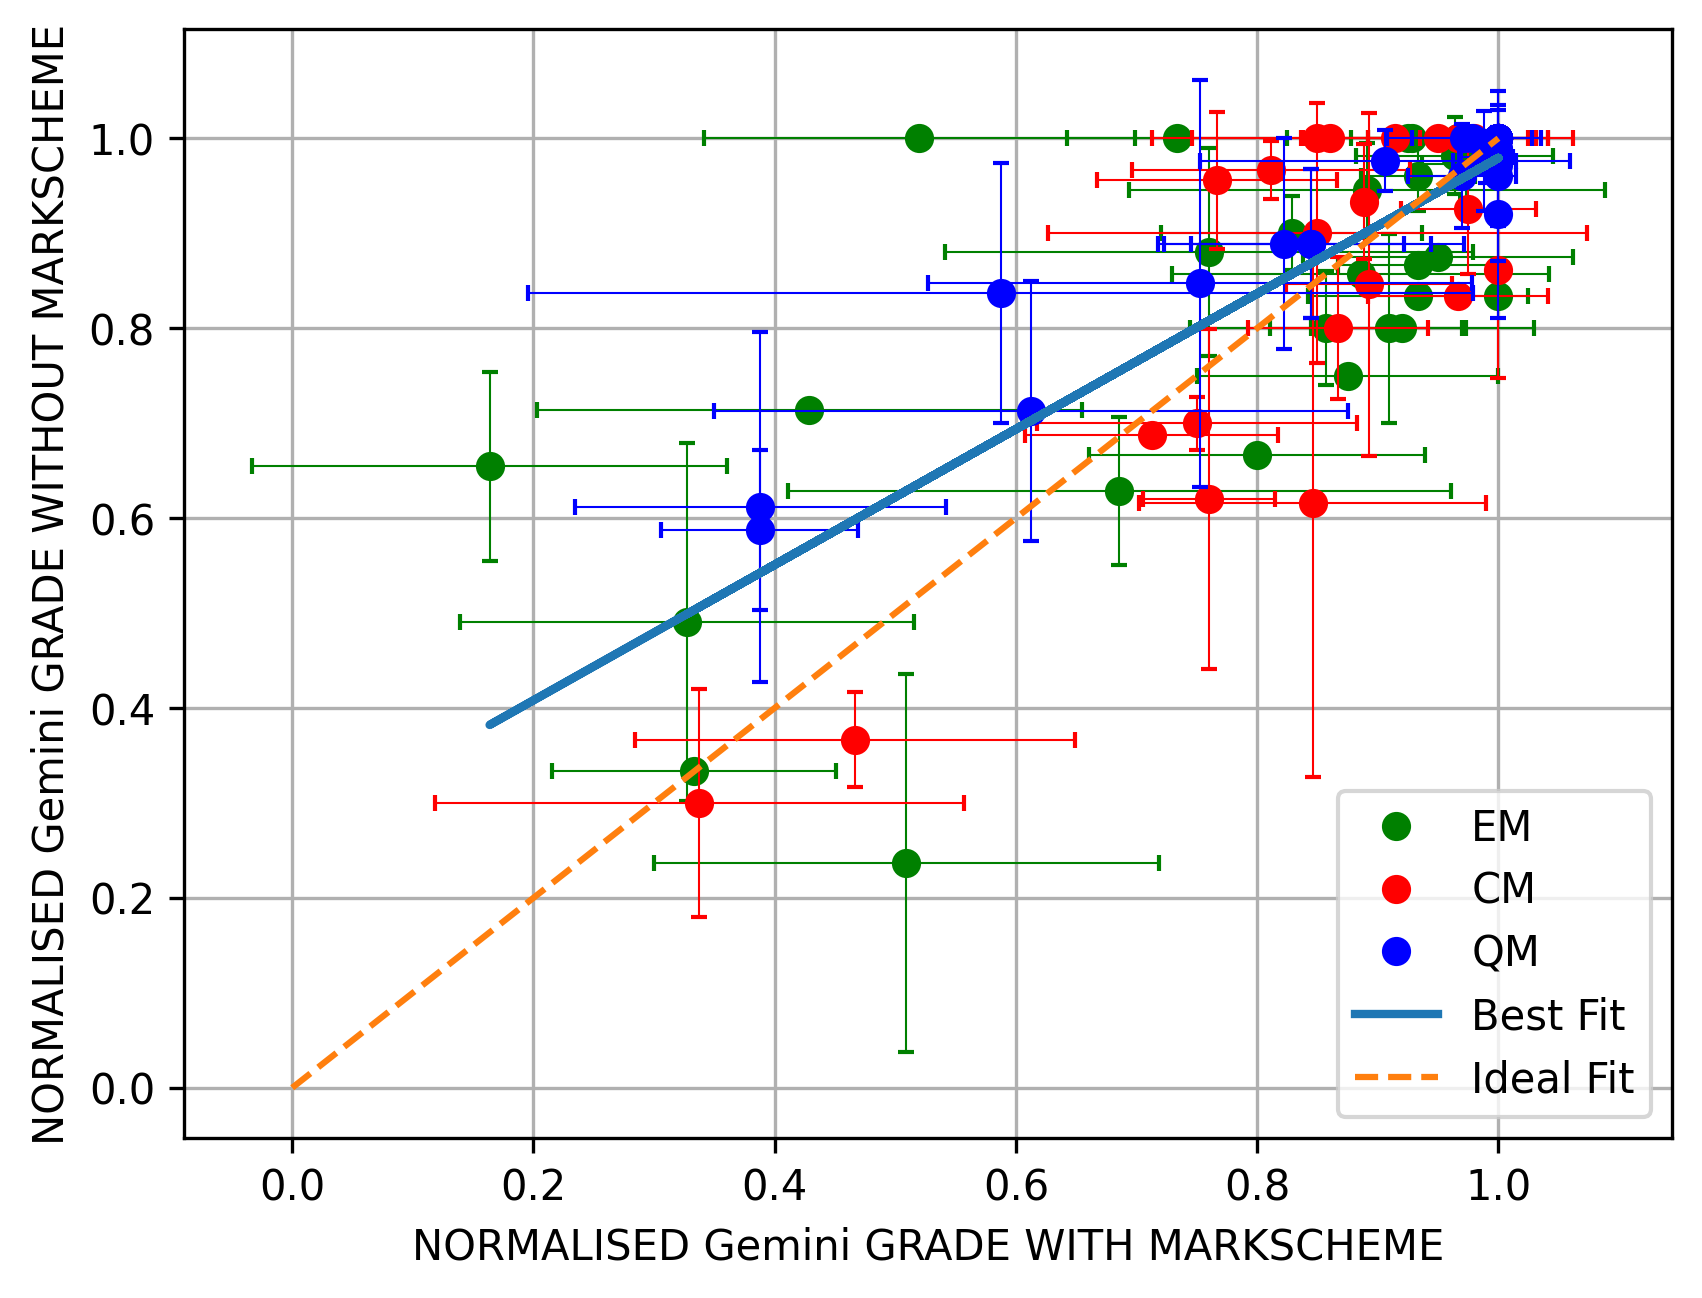

In [15]:
MS = [MS_EM, MS_CM, MS_QM]
NMS = [NMS_EM, NMS_CM, NMS_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)

# Plot the different points
plt.figure()
for i, (dfi, dfj) in enumerate(zip(MS, NMS)):
    # Plot data and set labels
    plt.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    plt.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels
plt.xlabel('NORMALISED Gemini GRADE WITH MARKSCHEME')
plt.ylabel('NORMALISED Gemini GRADE WITHOUT MARKSCHEME')

# Fit the trend line
z = np.polyfit(concat_MS['Norm'], concat_NMS['Norm'], 1)
p = np.poly1d(z)
plt.plot(concat_MS['Norm'], p(concat_MS['Norm']), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Show the plot
plt.legend()
plt.grid()
plt.savefig("Gemini_MvNM.png")
plt.show()

In [16]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_NMS['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7946036428481641, pvalue=8.999883769173763e-21)

# Regression Markscheme vs Human Graded

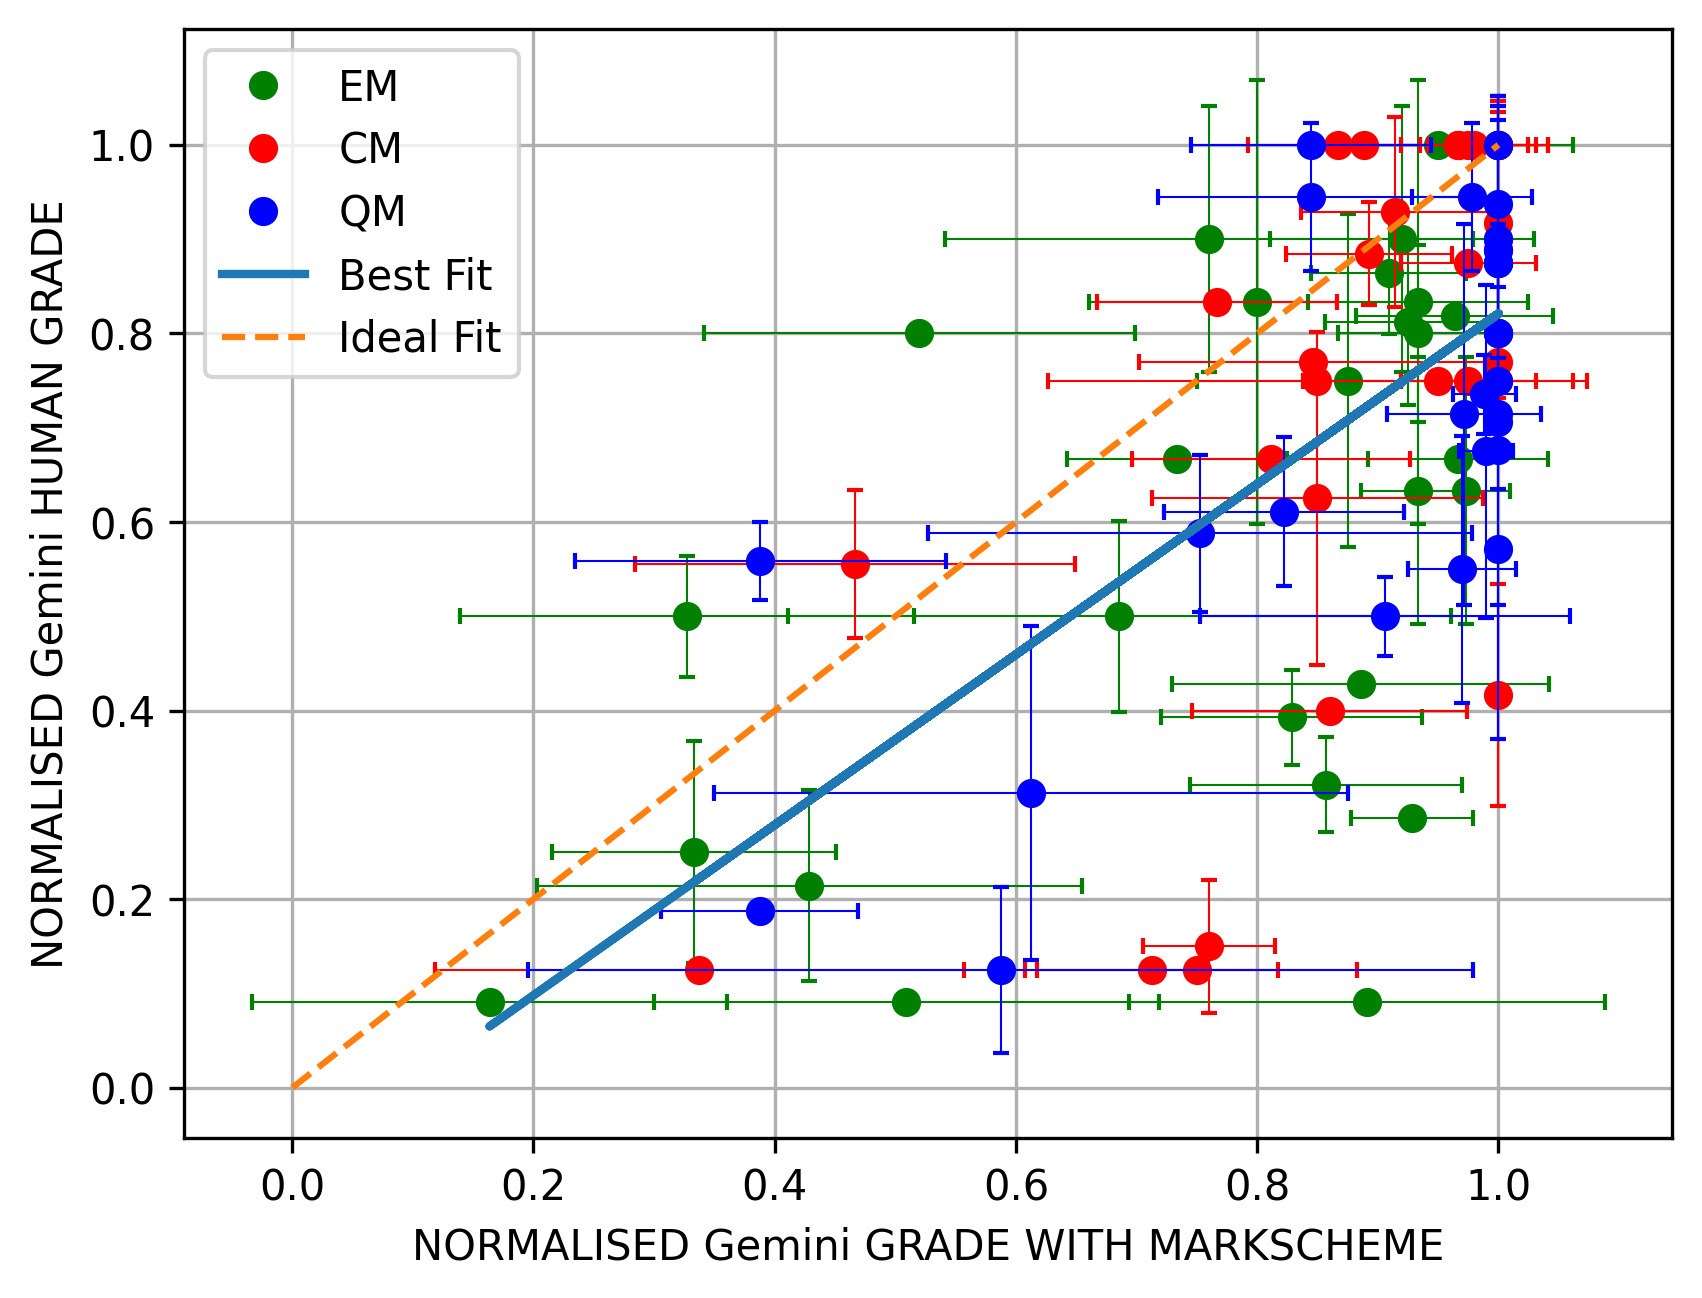

In [17]:
MS = [MS_EM, MS_CM, MS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Plot the different points
plt.figure()
for i, (dfi, dfj) in enumerate(zip(MS, HG)):
    # Plot data and set labels
    plt.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    plt.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels
plt.xlabel('NORMALISED Gemini GRADE WITH MARKSCHEME')
plt.ylabel('NORMALISED Gemini HUMAN GRADE')

# Fit the trend line
z = np.polyfit(concat_MS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
plt.plot(concat_MS['Norm'], p(concat_MS['Norm']), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Show the plot
plt.legend()
plt.grid()
plt.savefig("Gemini_MvHG.png")
plt.show()

In [18]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.6443803813372709, pvalue=7.248369971294107e-12)

# Regression No Markscheme vs Human Graded

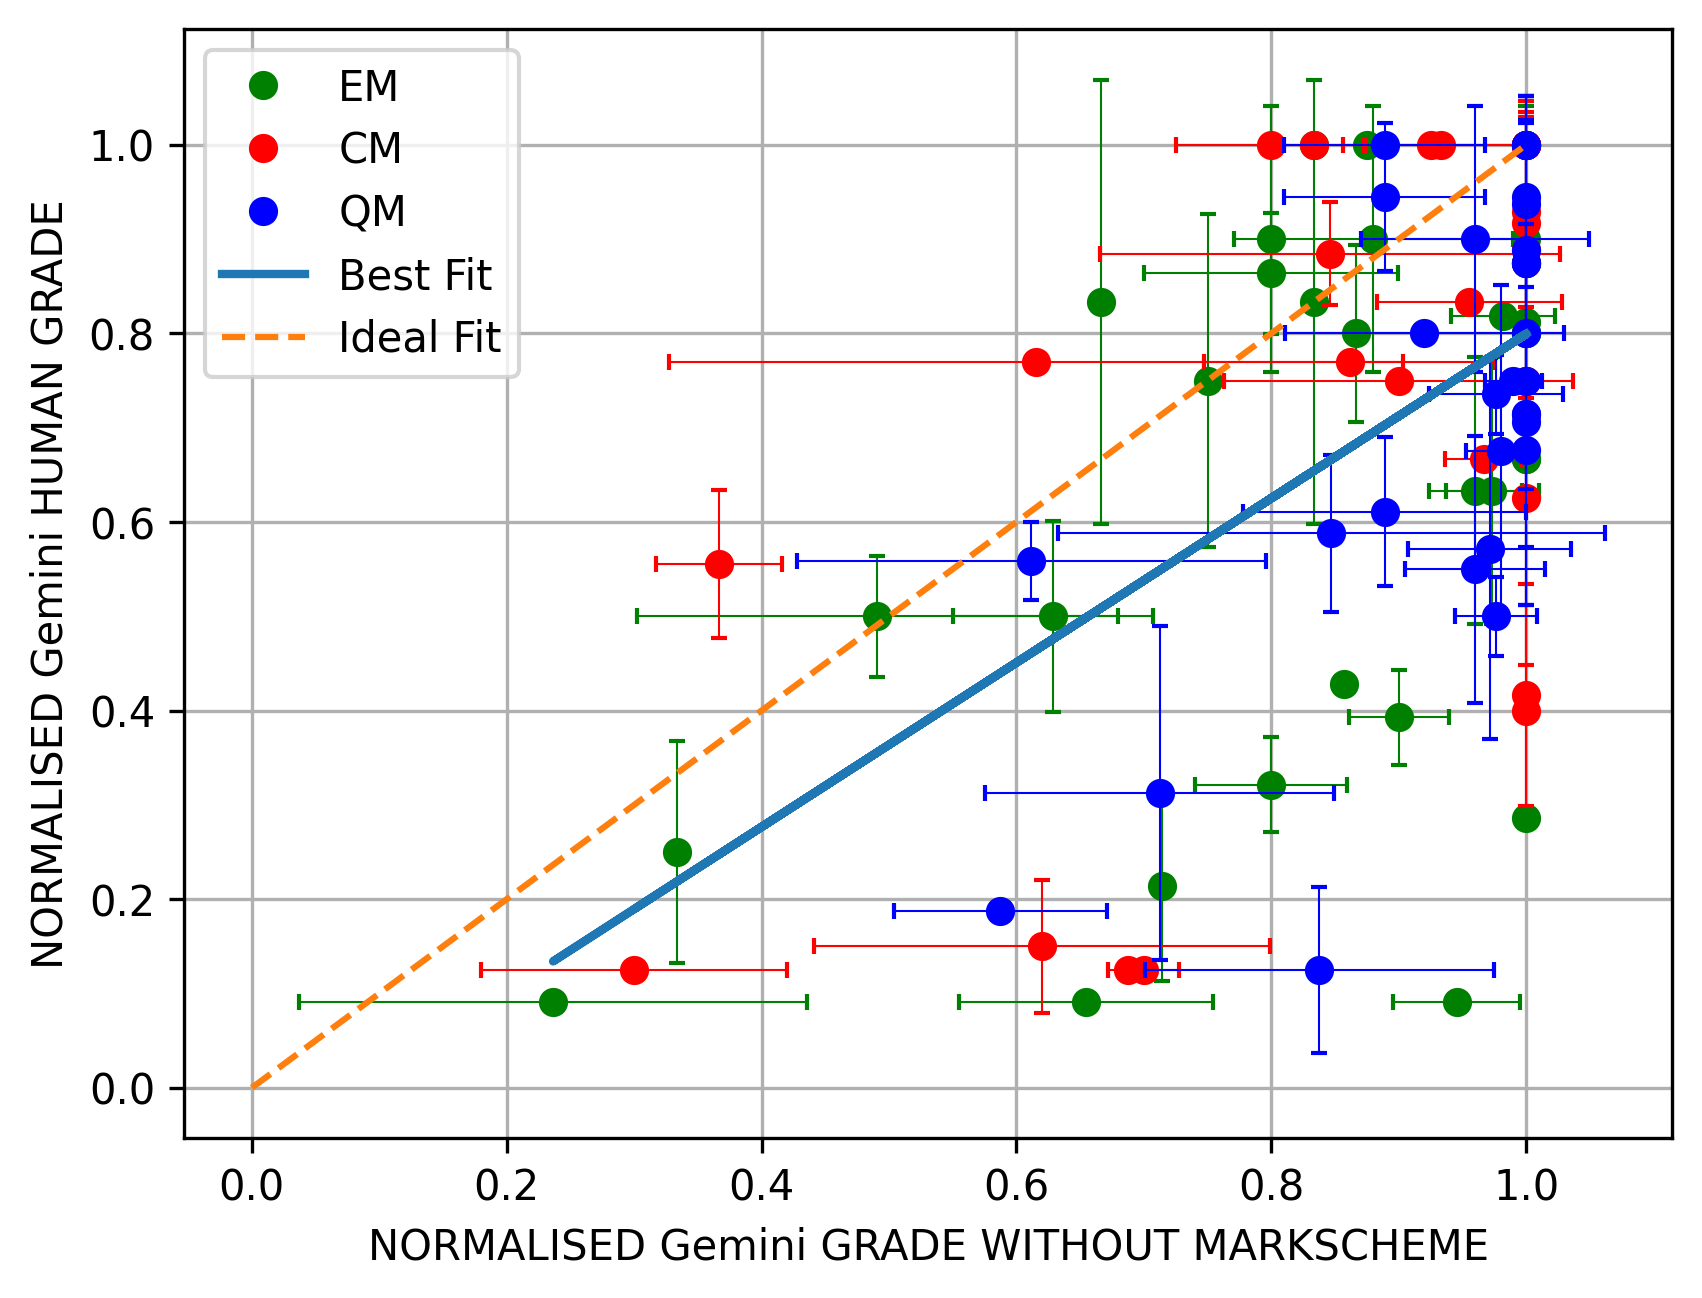

In [19]:
NMS = [NMS_EM, NMS_CM, NMS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Plot the different points
plt.figure()
for i, (dfi, dfj) in enumerate(zip(NMS, HG)):
    # Plot data and set labels
    plt.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    plt.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels
plt.xlabel('NORMALISED Gemini GRADE WITHOUT MARKSCHEME')
plt.ylabel('NORMALISED Gemini HUMAN GRADE')

# Fit the trend line
z = np.polyfit(concat_NMS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
plt.plot(concat_NMS['Norm'], p(concat_NMS['Norm']), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Show the plot
plt.legend()
plt.grid()
plt.savefig("Gemini_NMvHG.png")
plt.show()

In [20]:
scipy.stats.pearsonr(concat_NMS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.558297187574506, pvalue=1.0810769962651566e-08)

# Clustering Markscheme vs No Markscheme

In [21]:
clust_data_1 = list(zip(concat_MS['Norm'], concat_NMS['Norm']))

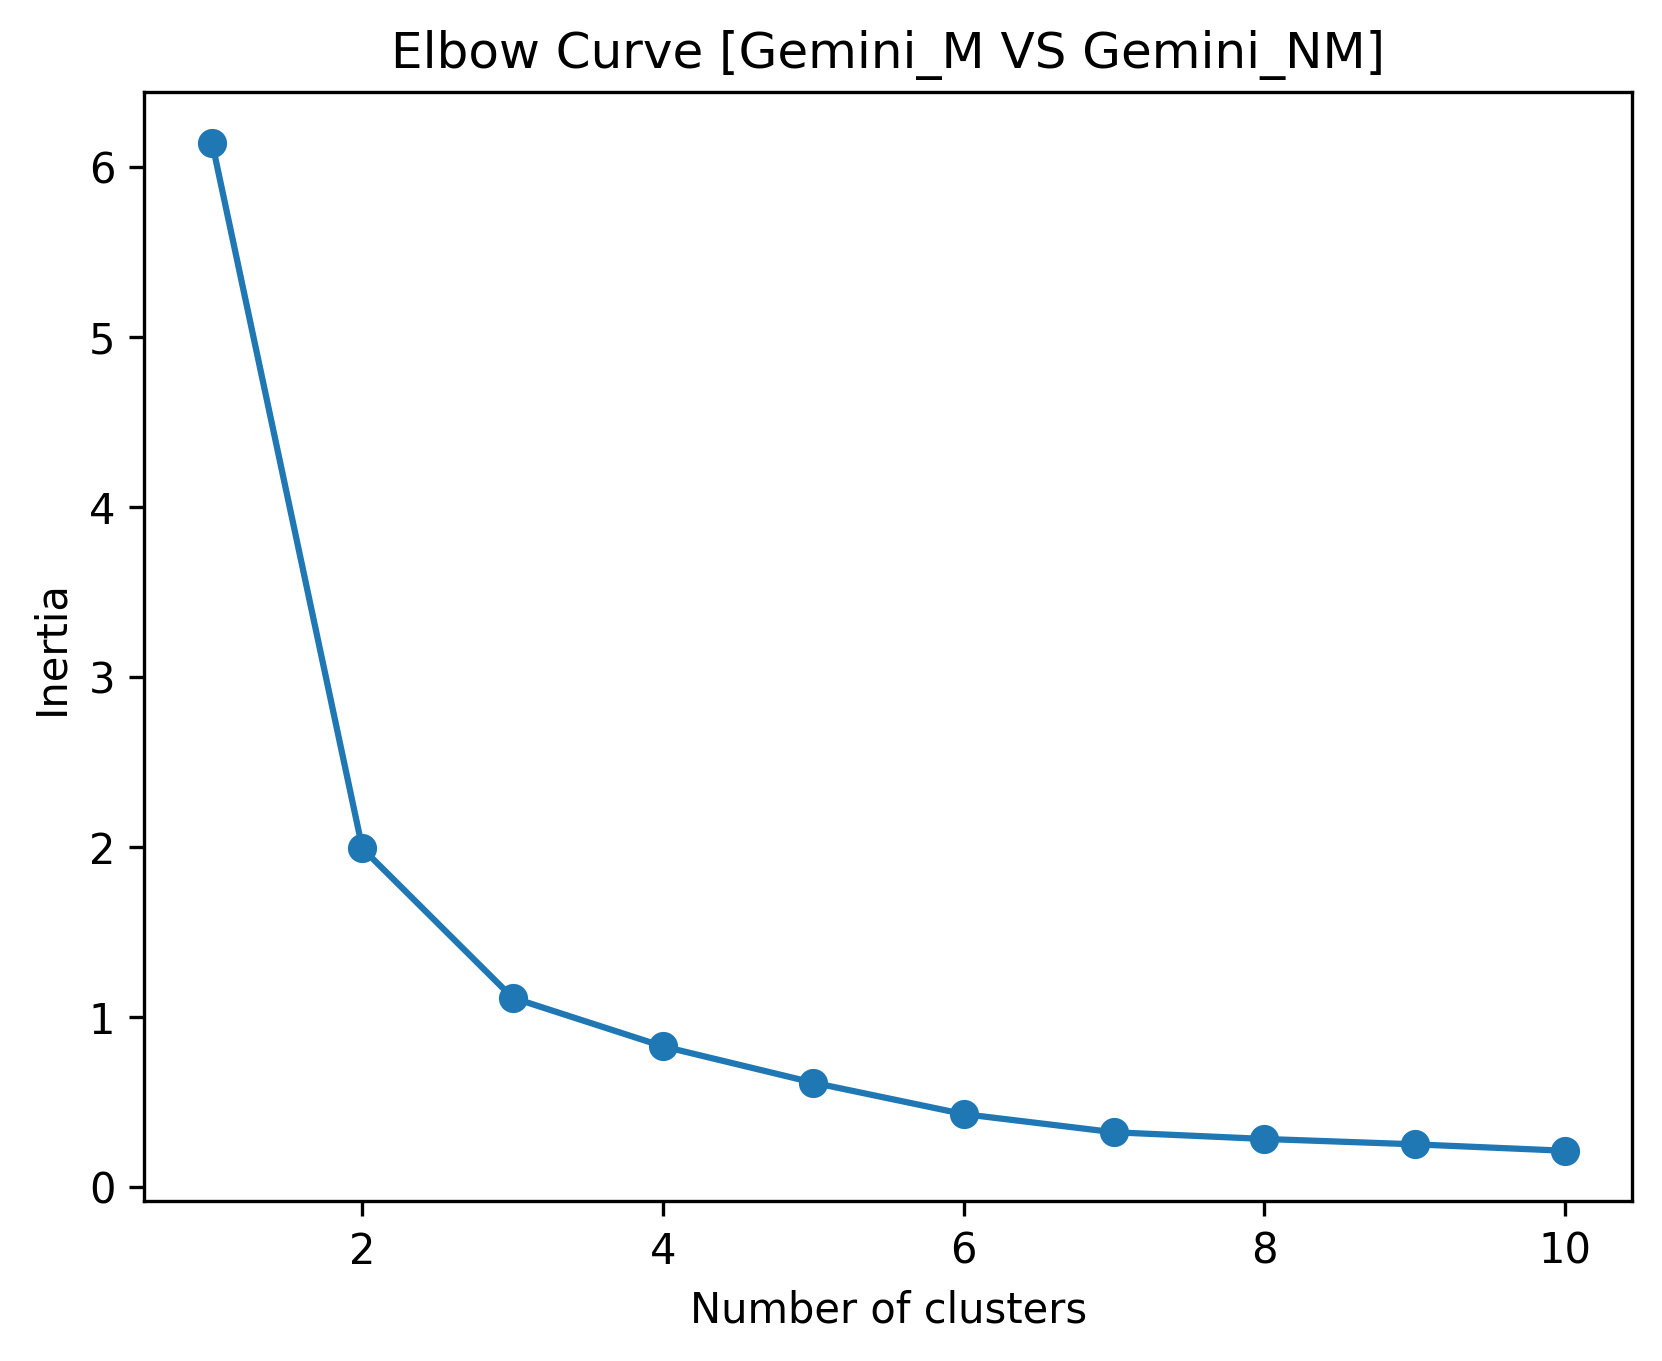

In [22]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_1)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Gemini_M VS Gemini_NM]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

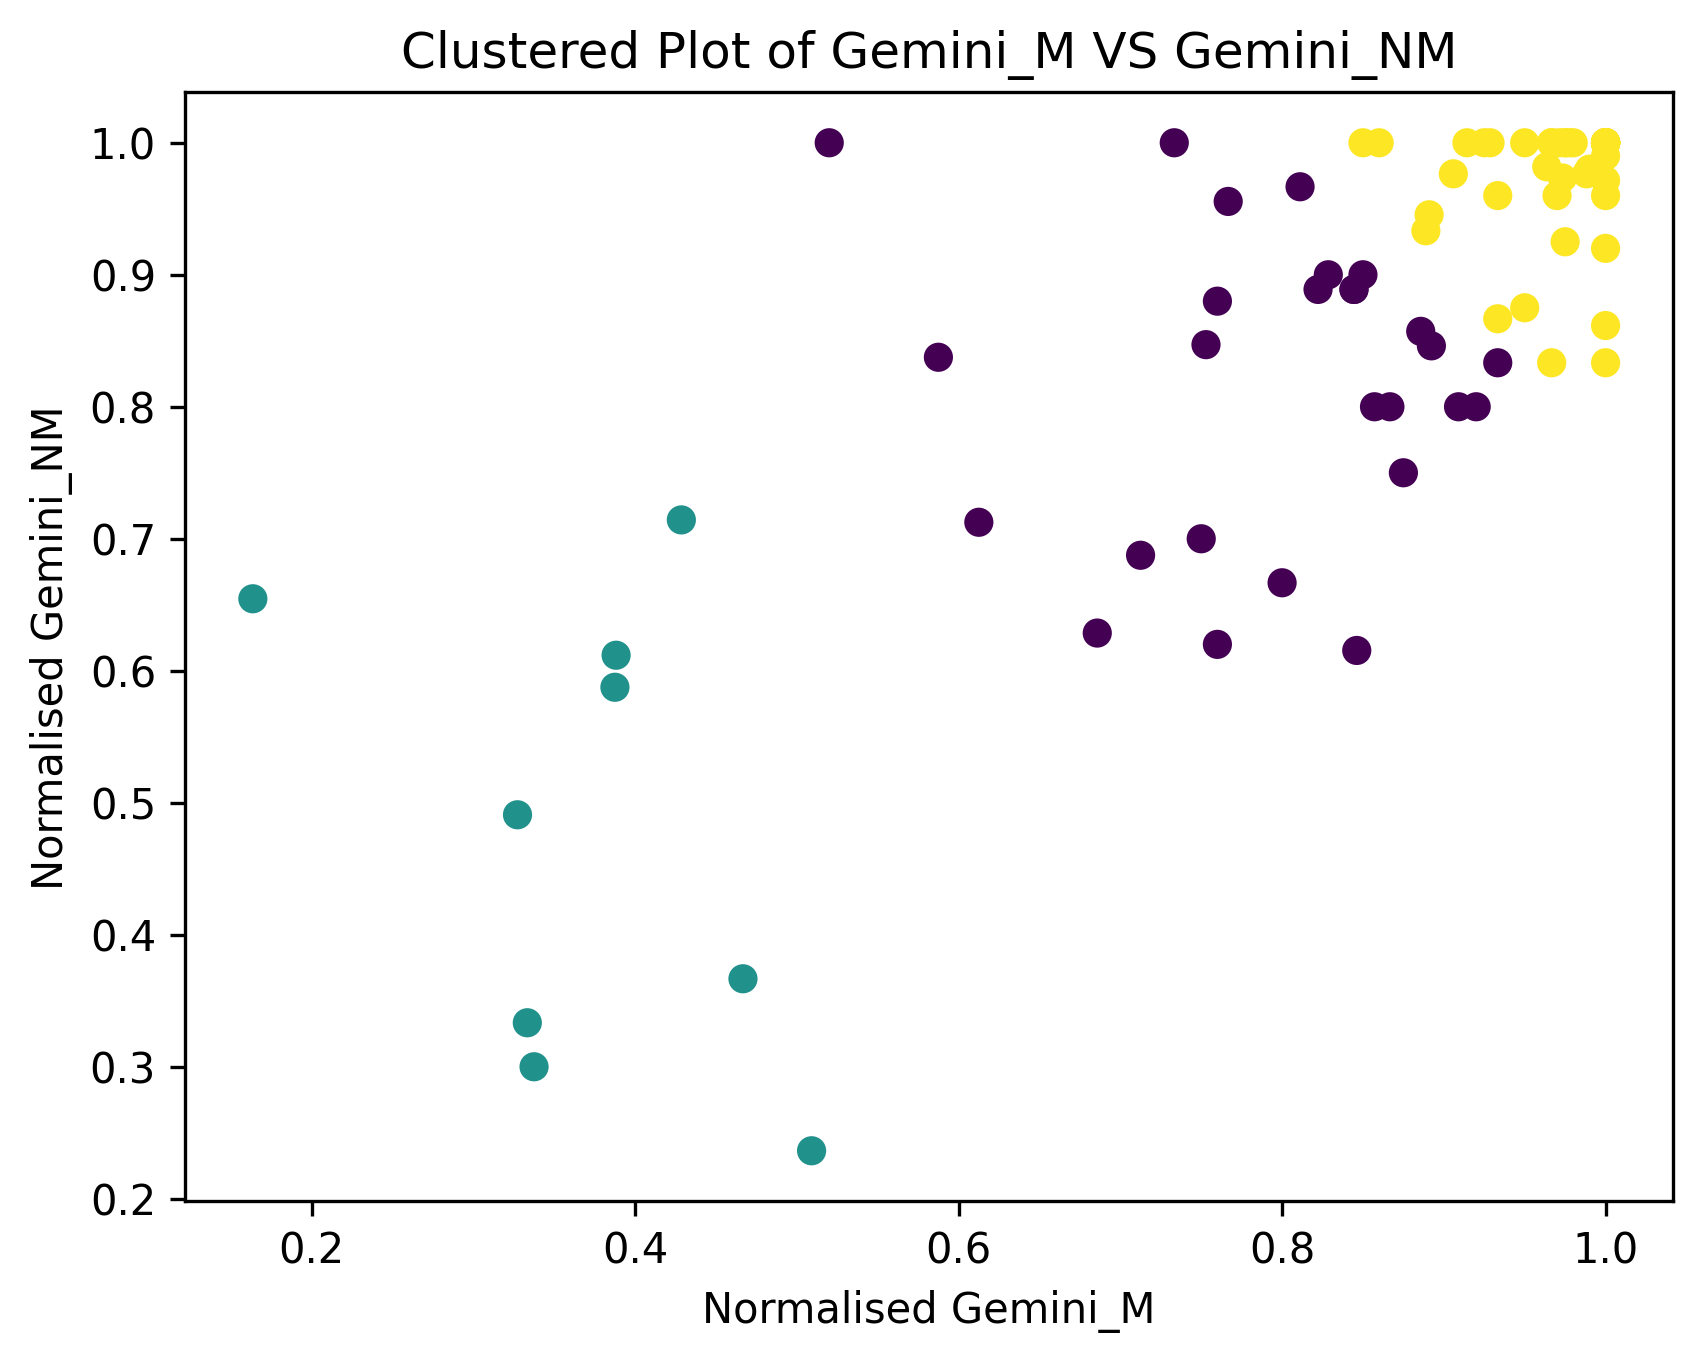

In [23]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_1)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_NMS['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Gemini_M")
plt.ylabel("Normalised Gemini_NM")
plt.title("Clustered Plot of Gemini_M VS Gemini_NM")
plt.show()

# Clustering Markscheme vs Human Grading

In [24]:
clust_data_2 = list(zip(concat_MS['Norm'], concat_HG['Norm']))

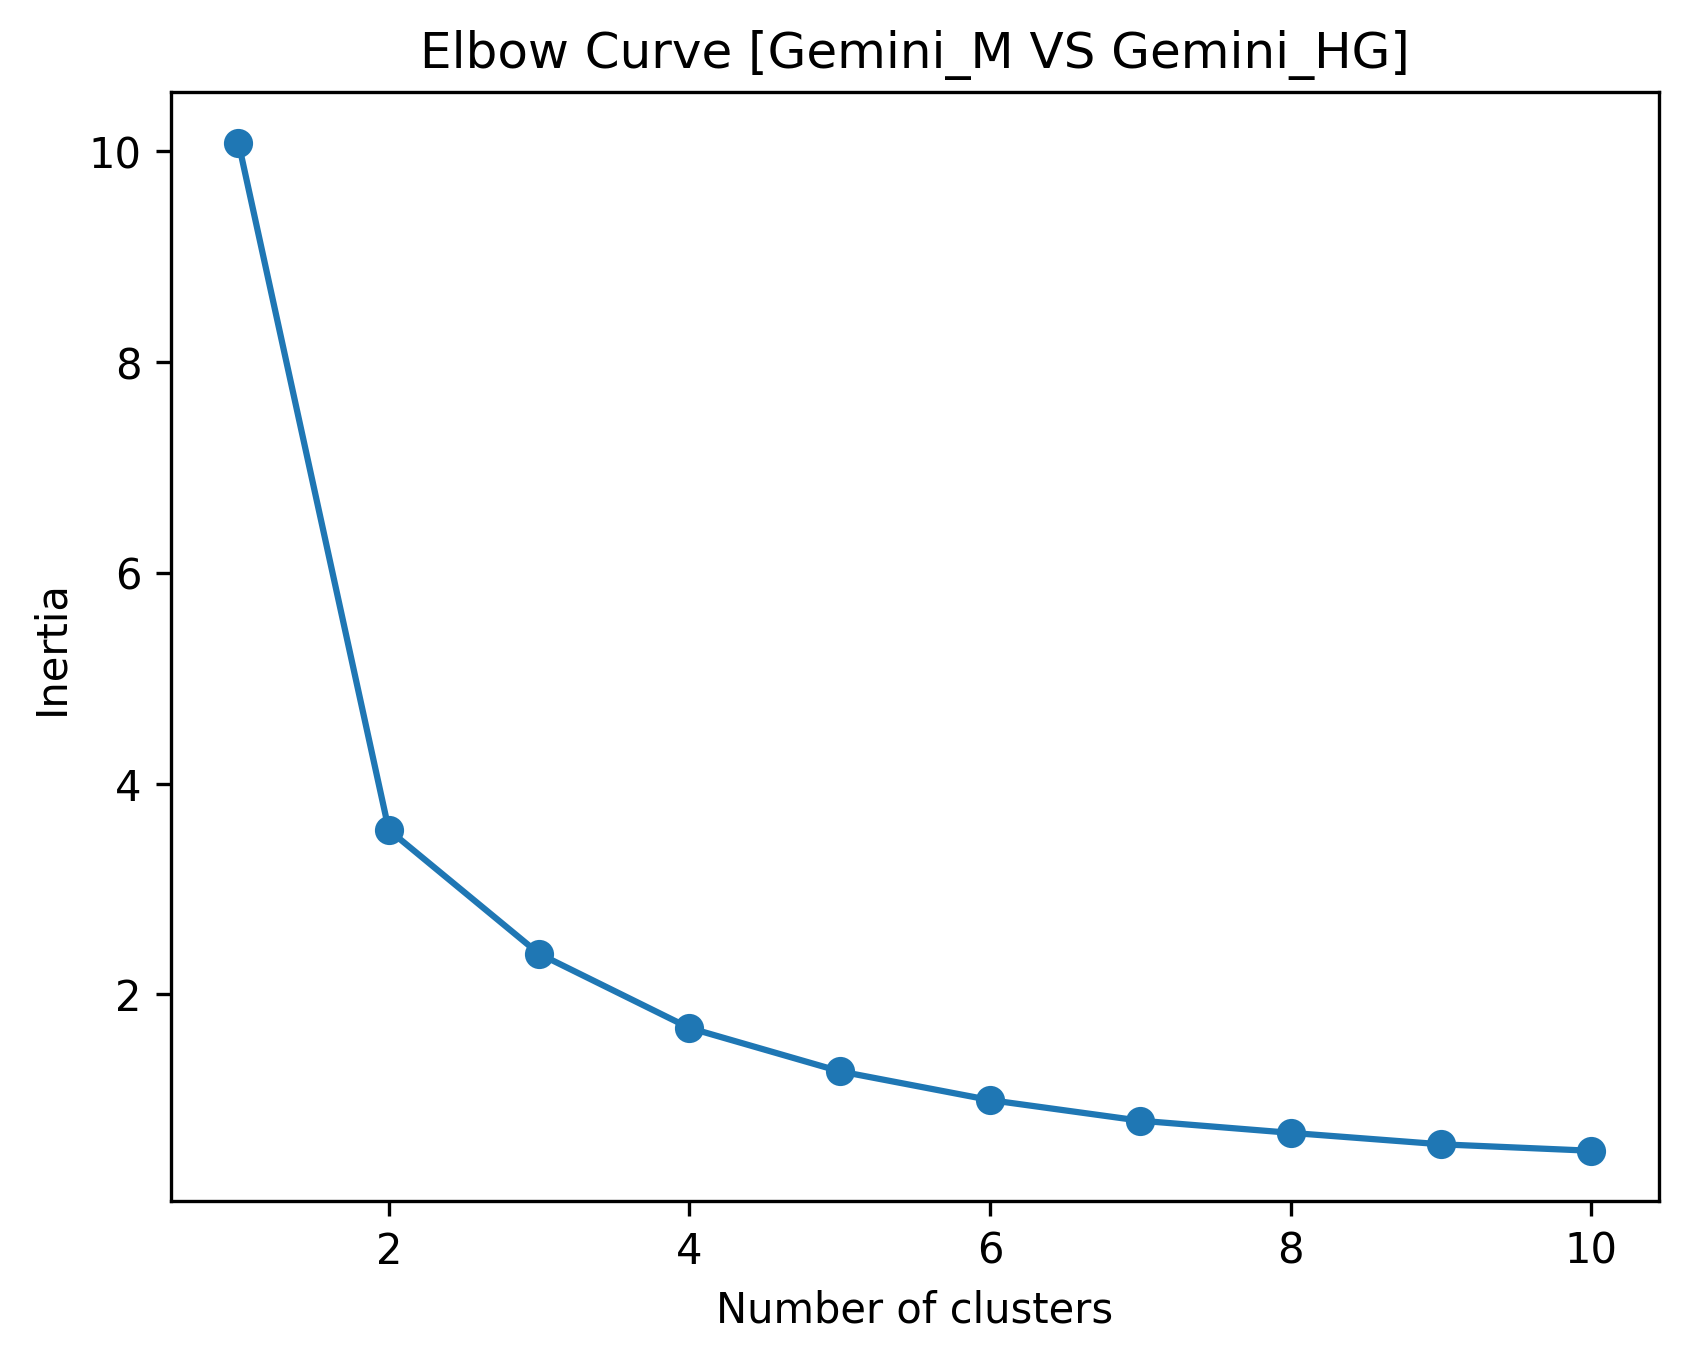

In [25]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_2)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Gemini_M VS Gemini_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

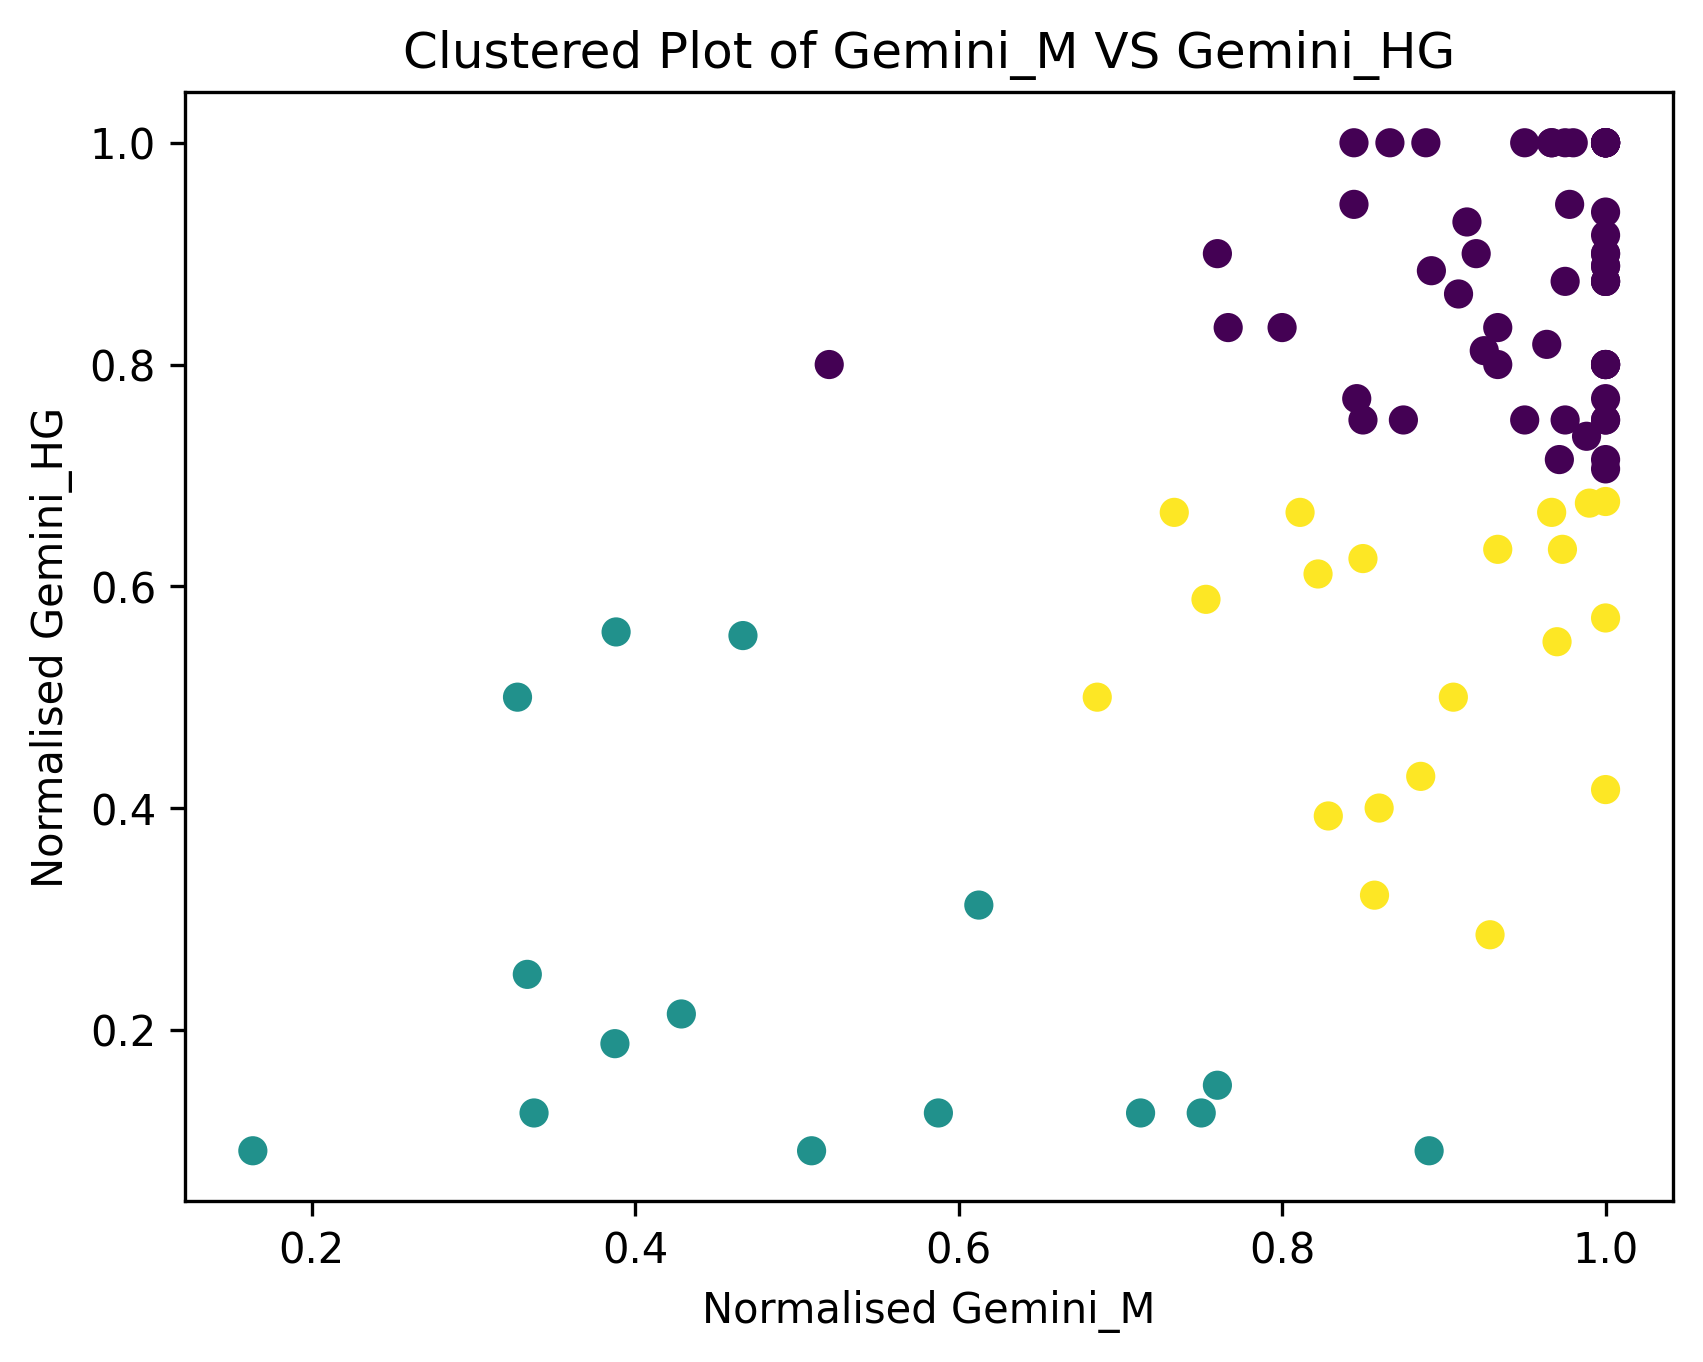

In [26]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_2)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Gemini_M")
plt.ylabel("Normalised Gemini_HG")
plt.title("Clustered Plot of Gemini_M VS Gemini_HG")
plt.show()

# Clustering No Markscheme vs Human Grading

In [27]:
clust_data_3 = list(zip(concat_NMS['Norm'], concat_HG['Norm']))

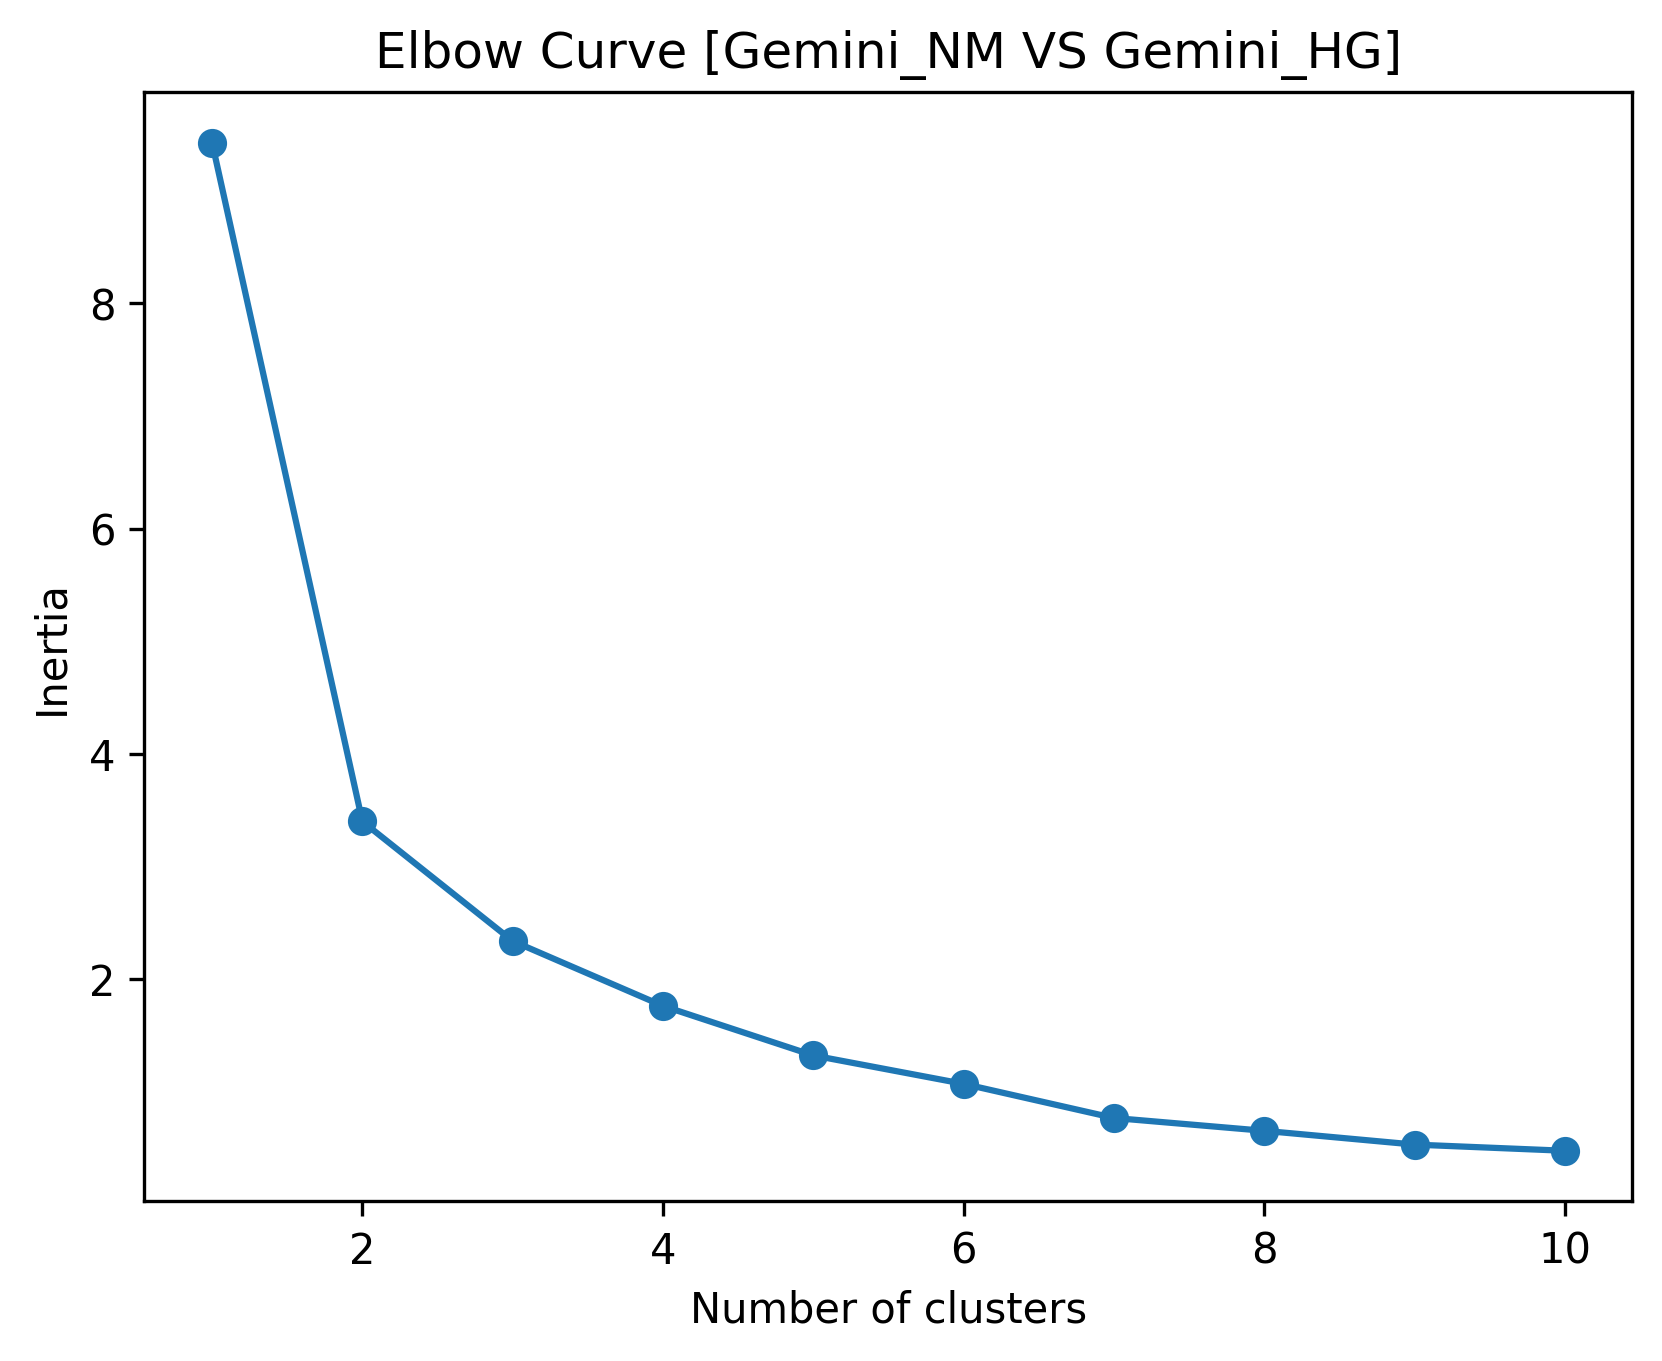

In [28]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_3)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Gemini_NM VS Gemini_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

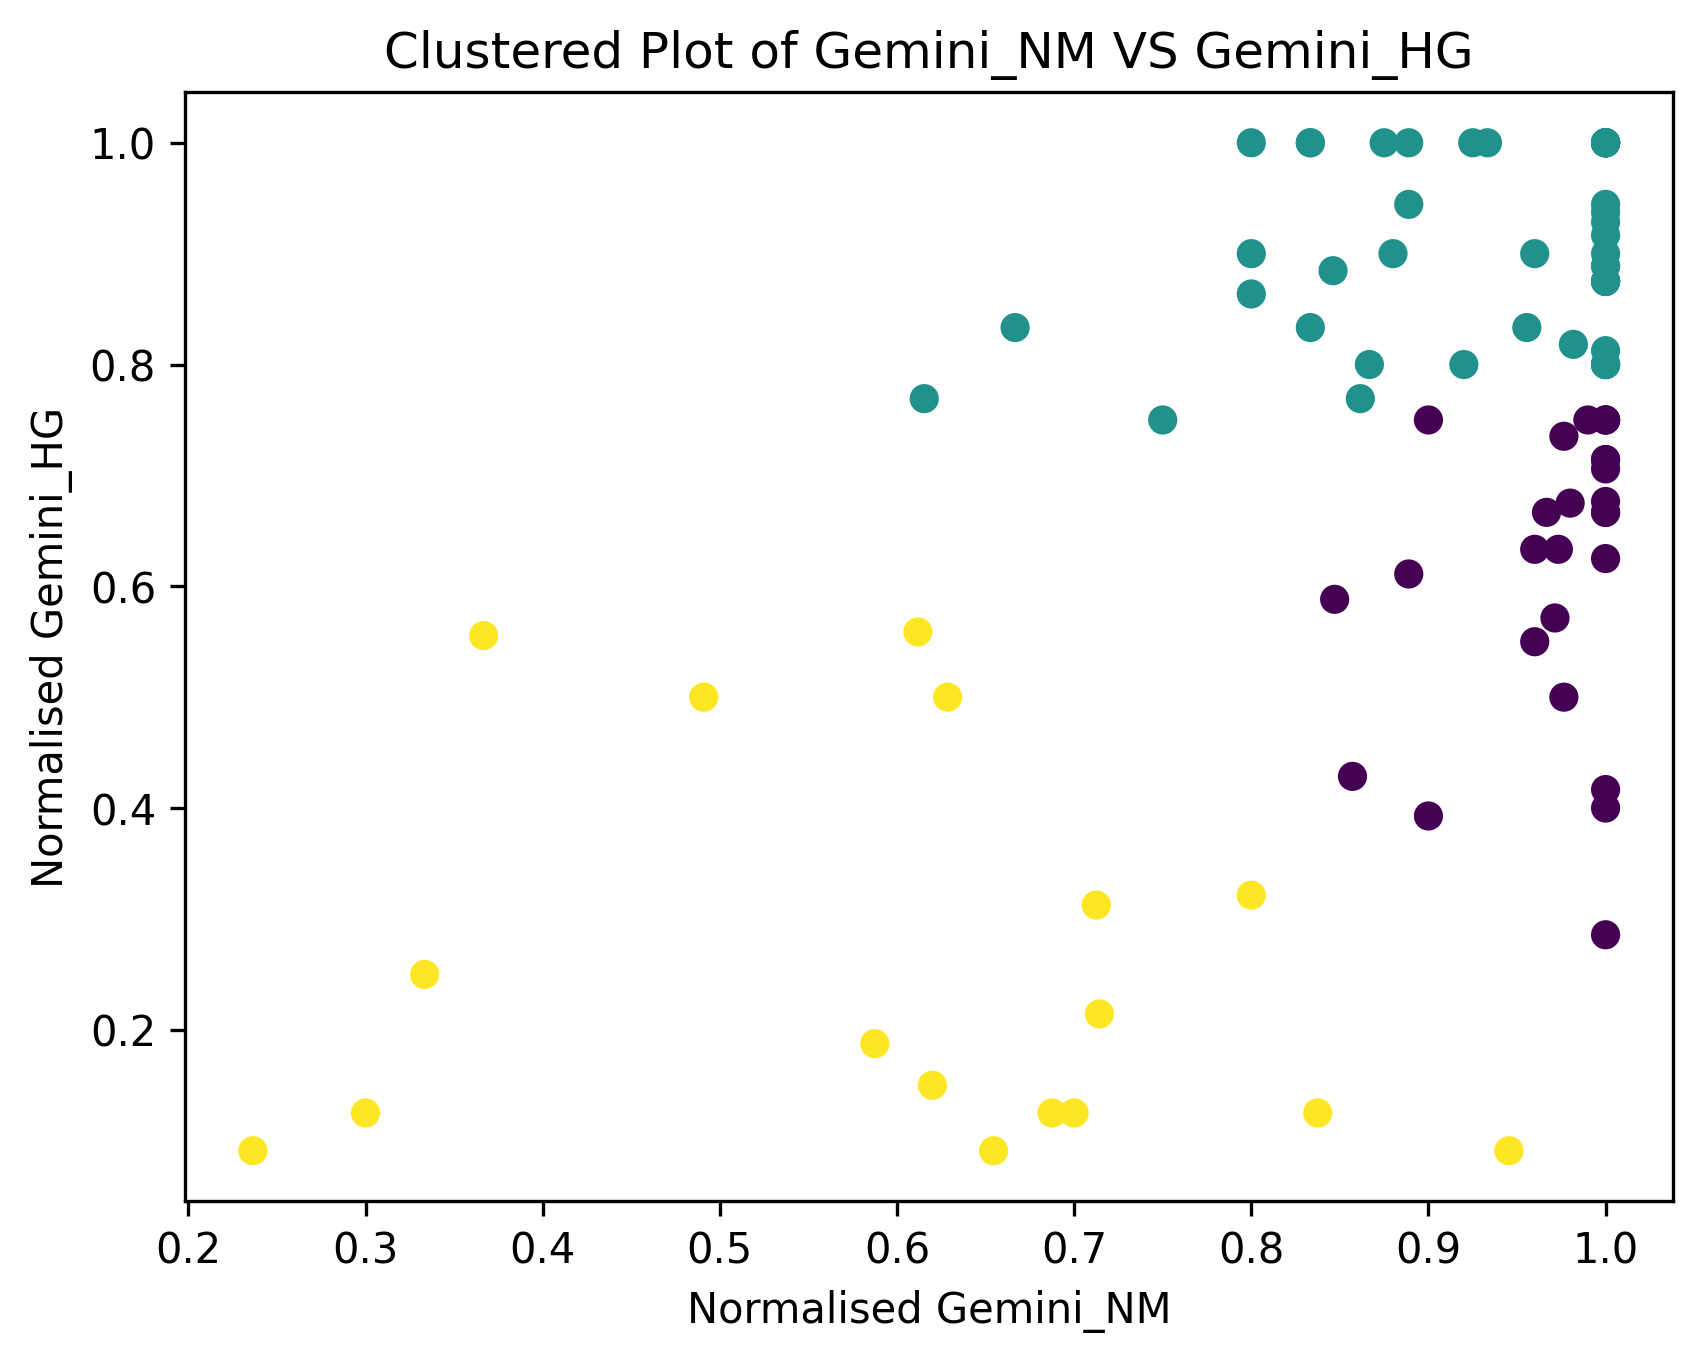

In [29]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_3)

#Plotting classified data
plt.scatter(concat_NMS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Gemini_NM")
plt.ylabel("Normalised Gemini_HG")
plt.title("Clustered Plot of Gemini_NM VS Gemini_HG")
plt.show()

# Implementing t-SNE


In [30]:
red_data = pd.concat([concat_MS, concat_NMS, concat_HG], axis = 1) #creating data with only normalised grades
red_data = red_data.loc[:, ['Norm']]
red_data.columns = ['Norm_MS', 'Norm_NMS', 'Norm_HG']

In [31]:
#running t-SNE
tsne = TSNE(learning_rate = 500, n_components = 2)
x_tsne = tsne.fit_transform(red_data)
y = np.concatenate(np.stack((np.repeat(1,30), np.repeat(2,30), np.repeat(3,30)), axis = 0)) #creating a subject marker
pd.DataFrame(x_tsne)

,0,1
0,2.360397,160.910202
1,25.089727,106.118896
2,-186.948929,-174.482025
3,210.419434,-63.228970
4,-235.841339,-25.545013
...,...,...
85,-103.278076,-153.098511
86,79.049232,182.884003
87,183.632370,244.792374
88,-87.219238,38.068562


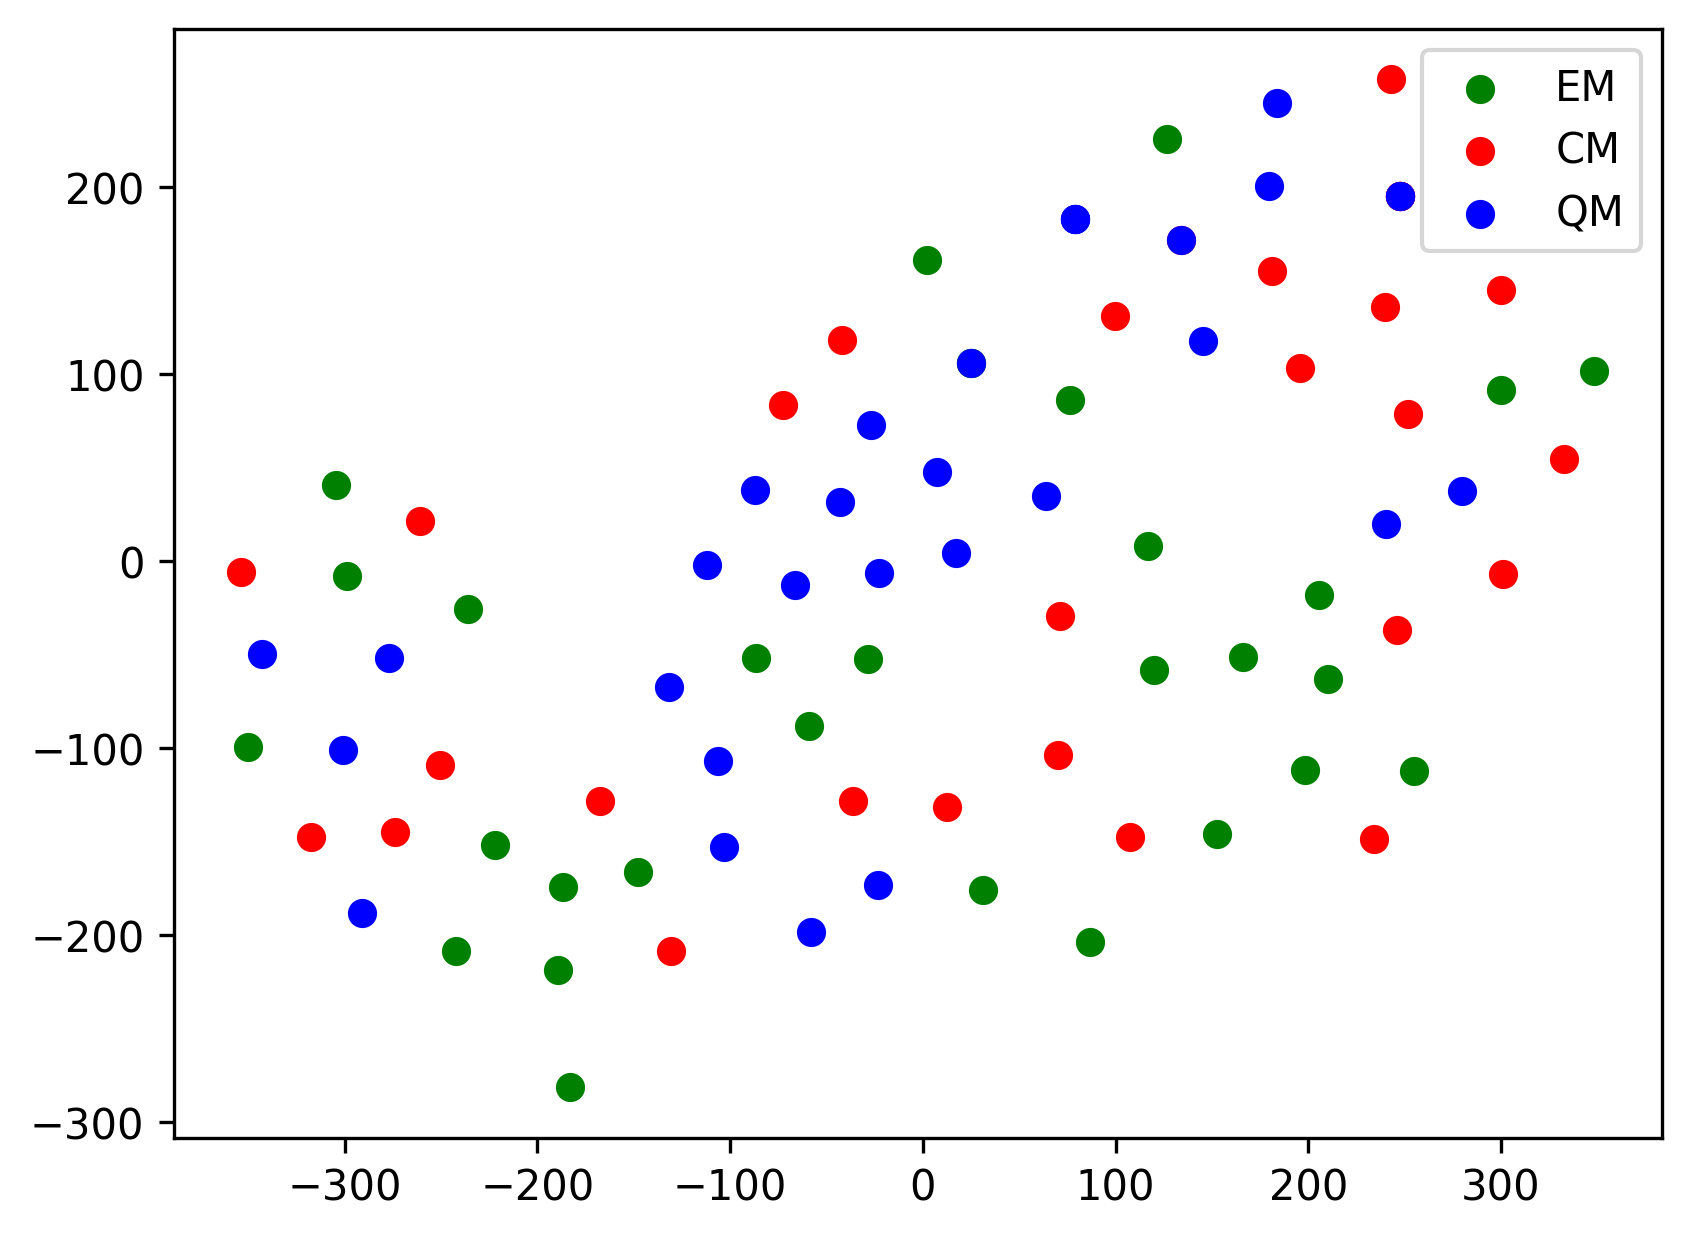

In [32]:
plt.figure()
plt.scatter(x_tsne[np.where(y==1),0], x_tsne[np.where(y==1), 1], color='g', label = "EM")
plt.scatter(x_tsne[np.where(y==2),0], x_tsne[np.where(y==2), 1], color='r', label = "CM")
plt.scatter(x_tsne[np.where(y==3),0], x_tsne[np.where(y==3), 1], color='b', label = "QM")
plt.legend()

In [33]:
clust_data_4 = tuple(map(tuple, x_tsne))

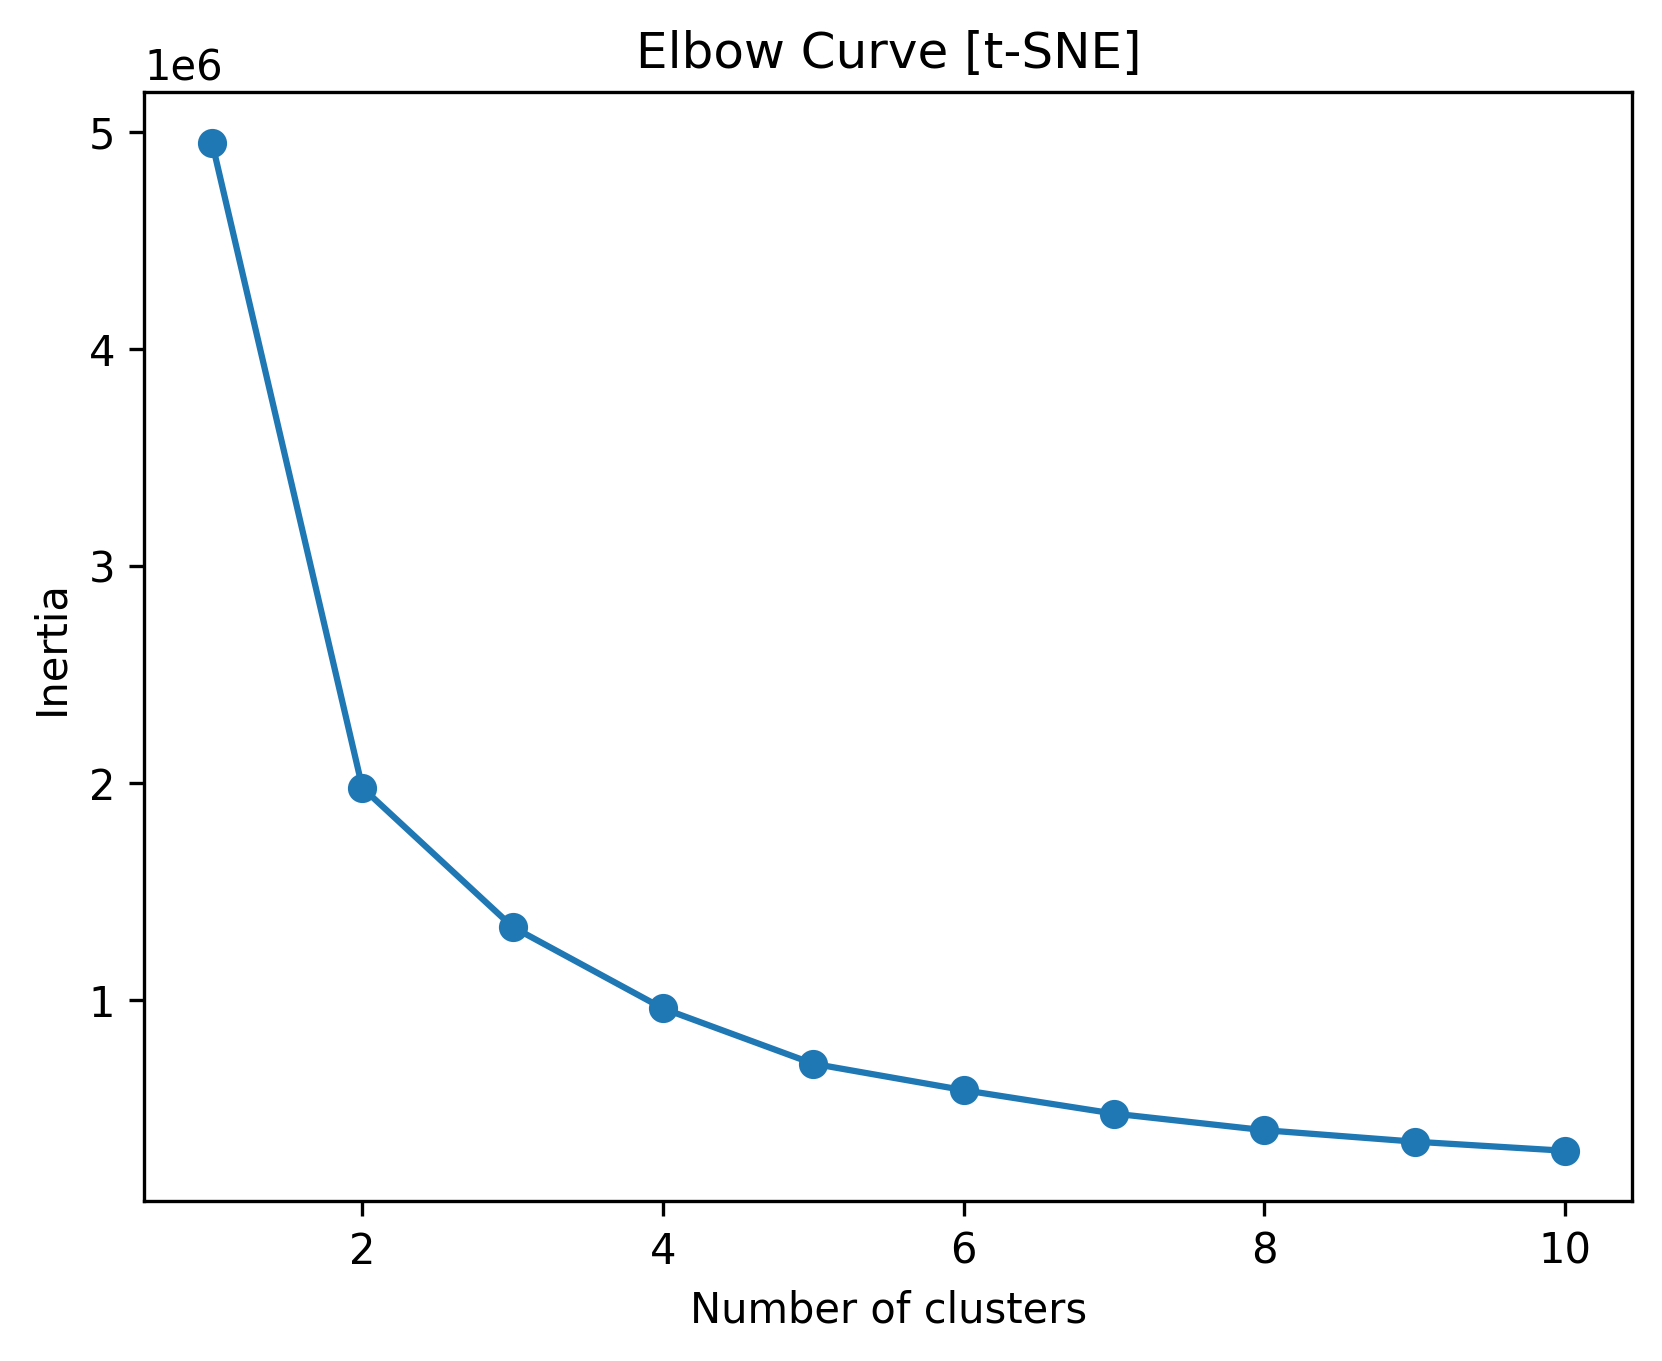

In [34]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_4)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [t-SNE]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

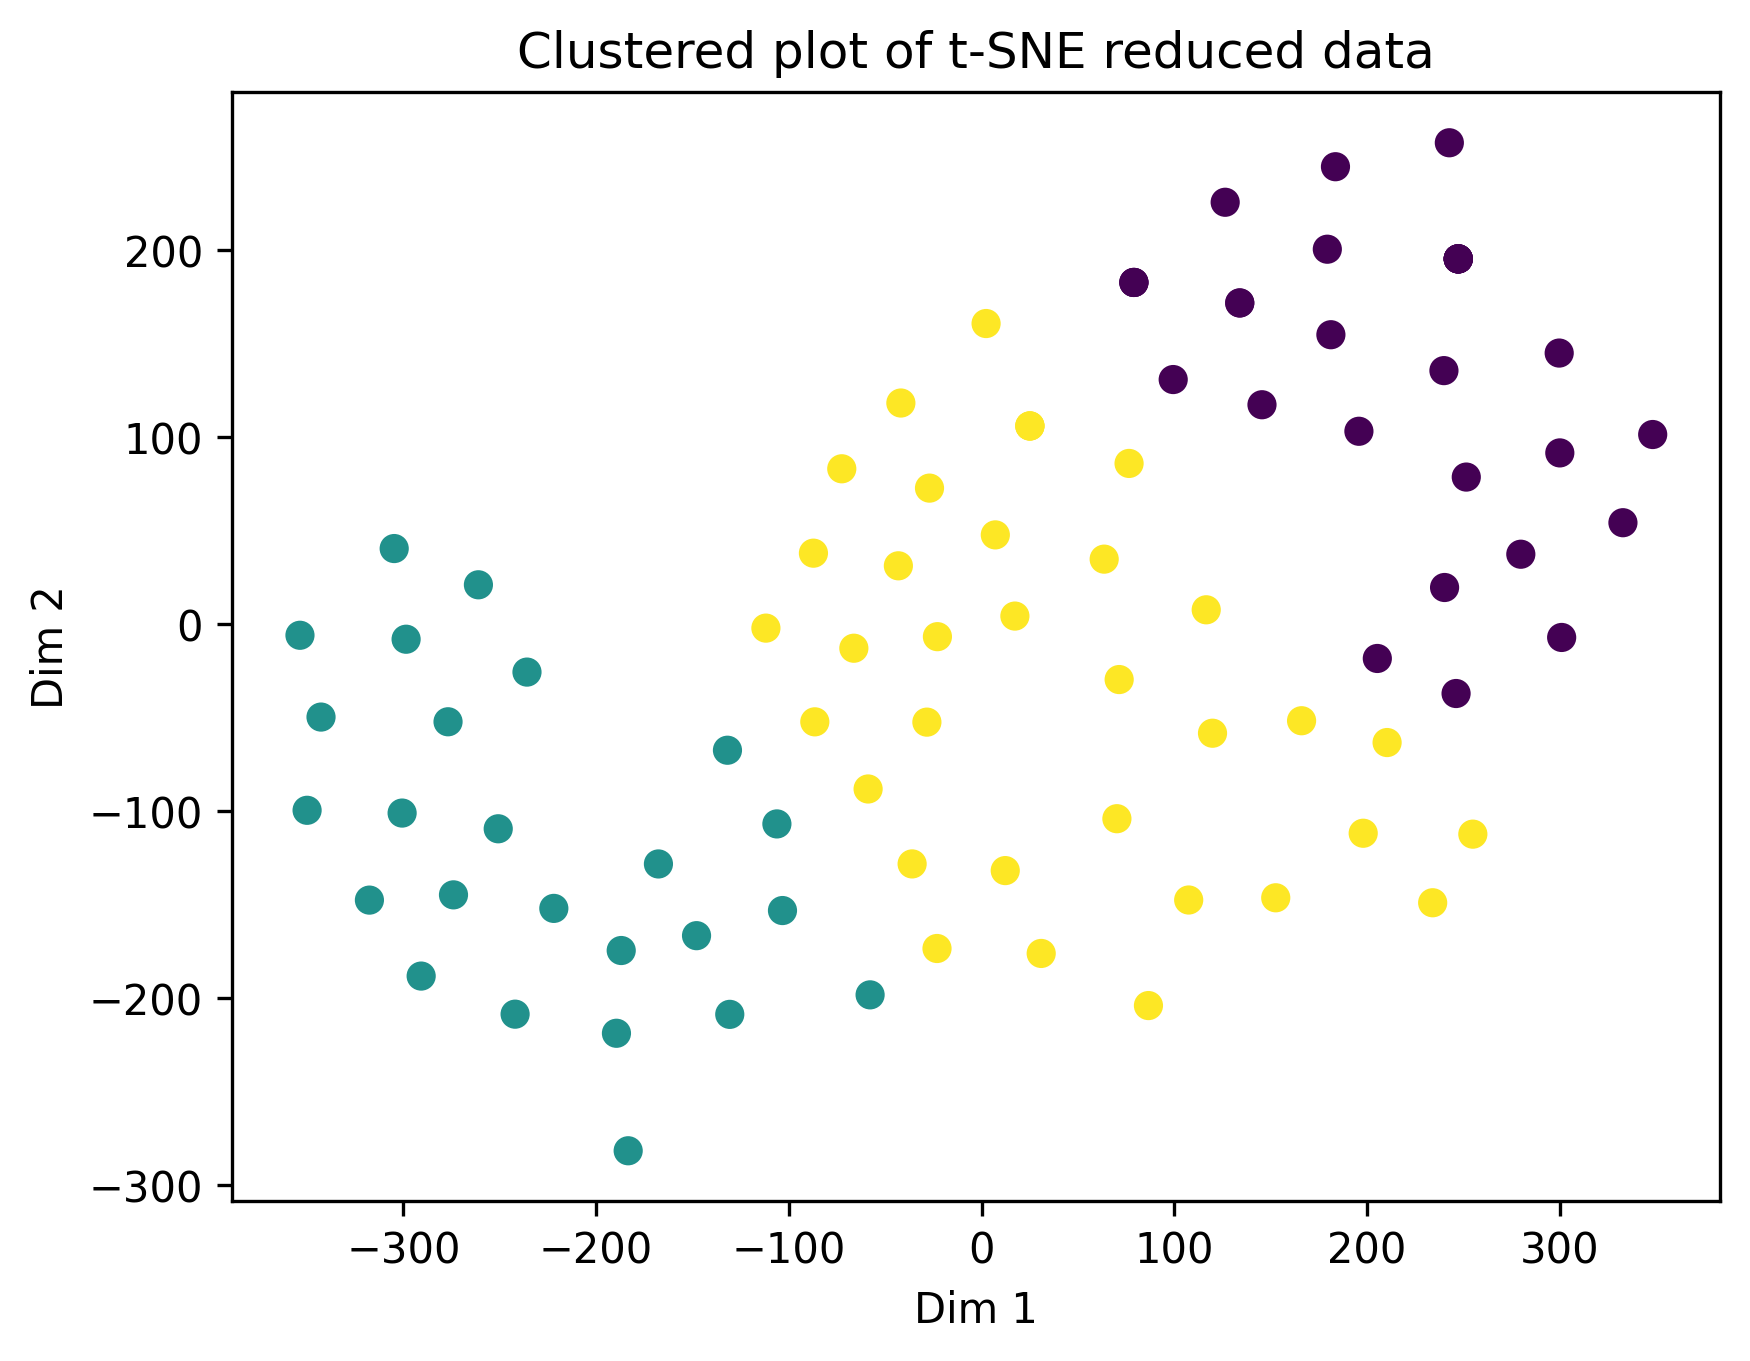

In [35]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_4)

#Plotting classified data
plt.scatter(x_tsne[np.where(y>0),0], x_tsne[np.where(y>0), 1], c=kmeans.labels_)
plt.title('Clustered plot of t-SNE reduced data')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()